In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
day_0 = pd.read_csv("data/prices_round_2_day_0.csv",  sep=';')
day_minus_1 = pd.read_csv("data/prices_round_2_day_-1.csv",  sep=';')
day_plus_1 = pd.read_csv("data/prices_round_2_day_1.csv",  sep=';')

all_data = pd.concat([day_minus_1, day_0, day_plus_1], ignore_index=True)

all_data["timestamp_update"] = (all_data["timestamp"]) + ((all_data["day"]+2) * 1000000)
all_data.sort_values(by=["timestamp_update"], inplace=True)
all_data.drop(columns=["timestamp", "day"], inplace=True)

all_data.head()

,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,timestamp_update
0,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0,1000000
1,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0,1000000
2,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0,1000000
3,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0,1000000
4,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0,1000000


In [8]:
all_data_pivot = pd.pivot_table(all_data, index=["timestamp_update"], columns=["product"])

In [11]:
all_data_pivot["ask_price_1"].corr()

product,CROISSANTS,DJEMBES,JAMS,KELP,PICNIC_BASKET1,PICNIC_BASKET2,RAINFOREST_RESIN,SQUID_INK
product,,,,,,,,
CROISSANTS,1.000000,0.840343,0.885356,-0.750638,0.949972,0.907479,0.010810,0.828966
DJEMBES,0.840343,1.000000,0.820153,-0.608992,0.819277,0.738496,0.007782,0.747851
JAMS,0.885356,0.820153,1.000000,-0.849475,0.946331,0.953186,0.009616,0.879545
KELP,-0.750638,-0.608992,-0.849475,1.000000,-0.831238,-0.878304,0.005574,-0.758090
PICNIC_BASKET1,0.949972,0.819277,0.946331,-0.831238,1.000000,0.955922,0.011824,0.818718
PICNIC_BASKET2,0.907479,0.738496,0.953186,-0.878304,0.955922,1.000000,0.008414,0.868690
RAINFOREST_RESIN,0.010810,0.007782,0.009616,0.005574,0.011824,0.008414,1.000000,0.005282
SQUID_INK,0.828966,0.747851,0.879545,-0.758090,0.818718,0.868690,0.005282,1.000000


# Correlation Analysis

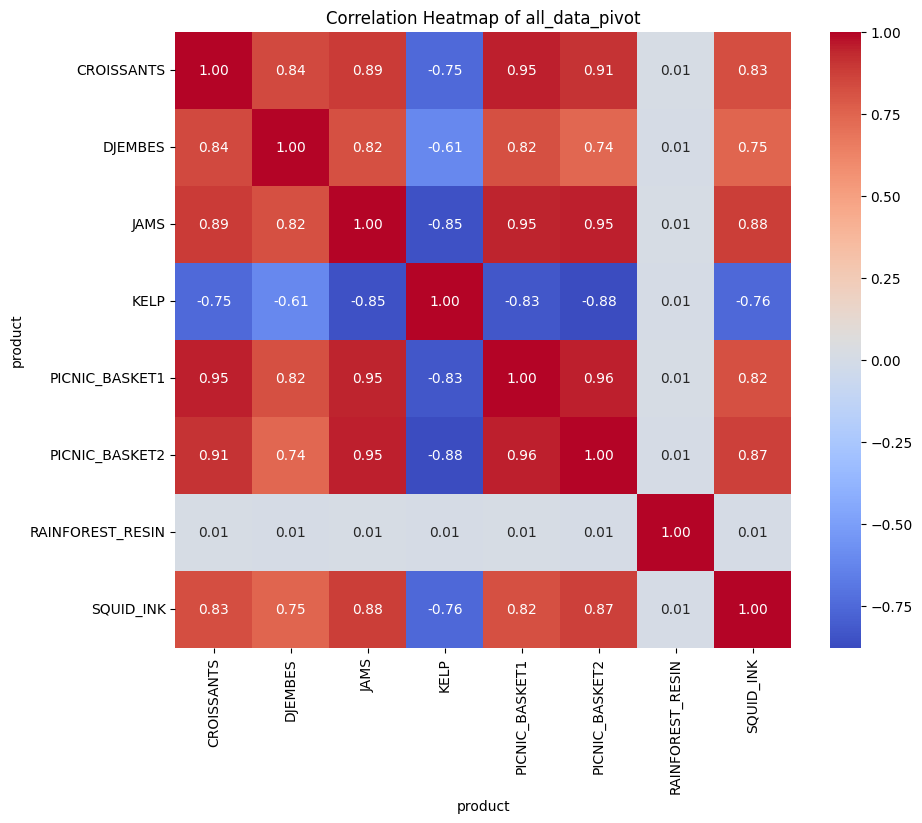

In [15]:
# Compute the correlation matrix
corr_matrix = all_data_pivot["ask_price_1"].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of all_data_pivot")
plt.show()


# Analysis Correlated assets

In [24]:
all_data_filtered = all_data[all_data["product"] != "RAINFOREST_RESIN"].copy()

In [25]:
all_data_pivot = pd.pivot_table(all_data_filtered, index=["timestamp_update"], columns=["product"])

all_data_pivot

ask_price_1                                          \
product           CROISSANTS  DJEMBES    JAMS    KELP PICNIC_BASKET1   
timestamp_update                                                       
1000000               4305.0  13451.0  6671.0  2029.0        59294.0   
1000100               4305.0  13451.0  6671.0  2028.0        59292.0   
1000200               4305.0  13451.0  6672.0  2028.0        59299.0   
1000300               4305.0  13451.0  6673.0  2028.0        59298.0   
1000400               4306.0  13453.0  6673.0  2028.0        59294.0   
...                      ...      ...     ...     ...            ...   
3999500               4269.0  13419.0  6521.0  2047.0        58725.0   
3999600               4269.0  13418.0  6520.0  2047.0        58725.0   
3999700               4269.0  13419.0  6520.0  2047.0        58717.0   
3999800               4269.0  13419.0  6521.0  2046.0        58730.0   
3999900               4267.0  13420.0  6521.0  2047.0        58724.0   

                                          ask_price_2                   ...  \
product          PICNIC_BASKET2 SQUID_INK  CROISSANTS  DJEMBES    JAMS  ...   
timestamp_update                                                        ...   
1000000                 30612.0    2006.0         NaN      NaN  6672.0  ...   
1000100                 30616.0    2007.0         NaN      NaN  6672.0  ...   
1000200                 30618.0    2006.0         NaN      NaN     NaN  ...   
1000300                 30623.0    2006.0         NaN      NaN     NaN  ...   
1000400                 30622.0    2007.0         NaN      NaN     NaN  ...   
...                         ...       ...         ...      ...     ...  ...   
3999500                 30120.0    1803.0         NaN      NaN     NaN  ...   
3999600                 30118.0    1803.0         NaN  13419.0  6521.0  ...   
3999700                 30113.0    1803.0         NaN      NaN  6521.0  ...   
3999800                 30115.0    1802.0         NaN      NaN     NaN  ...   
3999900                 30107.0    1802.0      4268.0      NaN     NaN  ...   

                      mid_price                          profit_and_loss  \
product          PICNIC_BASKET1 PICNIC_BASKET2 SQUID_INK      CROISSANTS   
timestamp_update                                                           
1000000                 59289.0        30609.0    2005.5             0.0   
1000100                 59287.0        30613.0    2005.5             0.0   
1000200                 59293.5        30615.0    2004.5             0.0   
1000300                 59293.5        30620.5    2004.5             0.0   
1000400                 59292.0        30621.0    2005.5             0.0   
...                         ...            ...       ...             ...   
3999500                 58720.5        30117.5    1802.5             0.0   
3999600                 58719.5        30115.0    1802.0             0.0   
3999700                 58715.0        30112.0    1801.5             0.0   
3999800                 58725.5        30112.5    1801.0             0.0   
3999900                 58718.5        30103.5    1800.5             0.0   

                                                                            
product          DJEMBES JAMS KELP PICNIC_BASKET1 PICNIC_BASKET2 SQUID_INK  
timestamp_update                                                            
1000000              0.0  0.0  0.0            0.0            0.0       0.0  
1000100              0.0  0.0  0.0            0.0            0.0       0.0  
1000200              0.0  0.0  0.0            0.0            0.0       0.0  
1000300              0.0  0.0  0.0            0.0            0.0       0.0  
1000400              0.0  0.0  0.0            0.0            0.0       0.0  
...                  ...  ...  ...            ...            ...       ...  
3999500              0.0  0.0  0.0            0.0            0.0       0.0  
3999600              0.0  0.0  0.0            0.0            0.0  

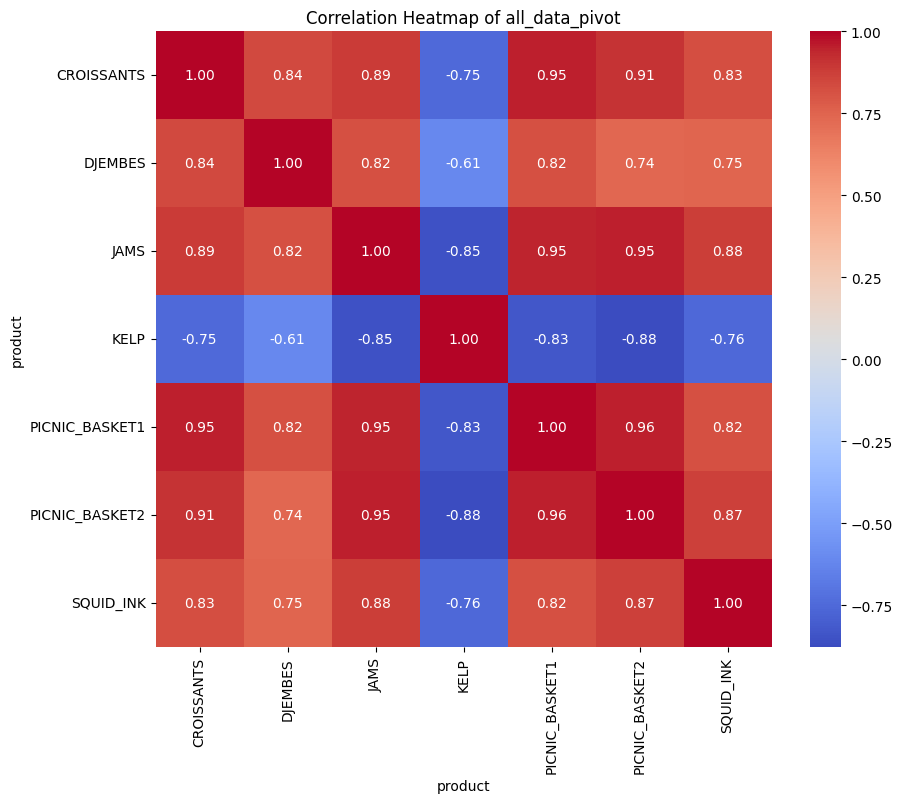

In [32]:
# Compute the correlation matrix
corr_matrix = all_data_pivot["ask_price_1"].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of all_data_pivot")
plt.show()


In [33]:
print(corr_matrix)

product         CROISSANTS   DJEMBES      JAMS      KELP  PICNIC_BASKET1  \
product                                                                    
CROISSANTS        1.000000  0.840343  0.885356 -0.750638        0.949972   
DJEMBES           0.840343  1.000000  0.820153 -0.608992        0.819277   
JAMS              0.885356  0.820153  1.000000 -0.849475        0.946331   
KELP             -0.750638 -0.608992 -0.849475  1.000000       -0.831238   
PICNIC_BASKET1    0.949972  0.819277  0.946331 -0.831238        1.000000   
PICNIC_BASKET2    0.907479  0.738496  0.953186 -0.878304        0.955922   
SQUID_INK         0.828966  0.747851  0.879545 -0.758090        0.818718   

product         PICNIC_BASKET2  SQUID_INK  
product                                    
CROISSANTS            0.907479   0.828966  
DJEMBES               0.738496   0.747851  
JAMS                  0.953186   0.879545  
KELP                 -0.878304  -0.758090  
PICNIC_BASKET1        0.955922   0.818718  
PICNIC_

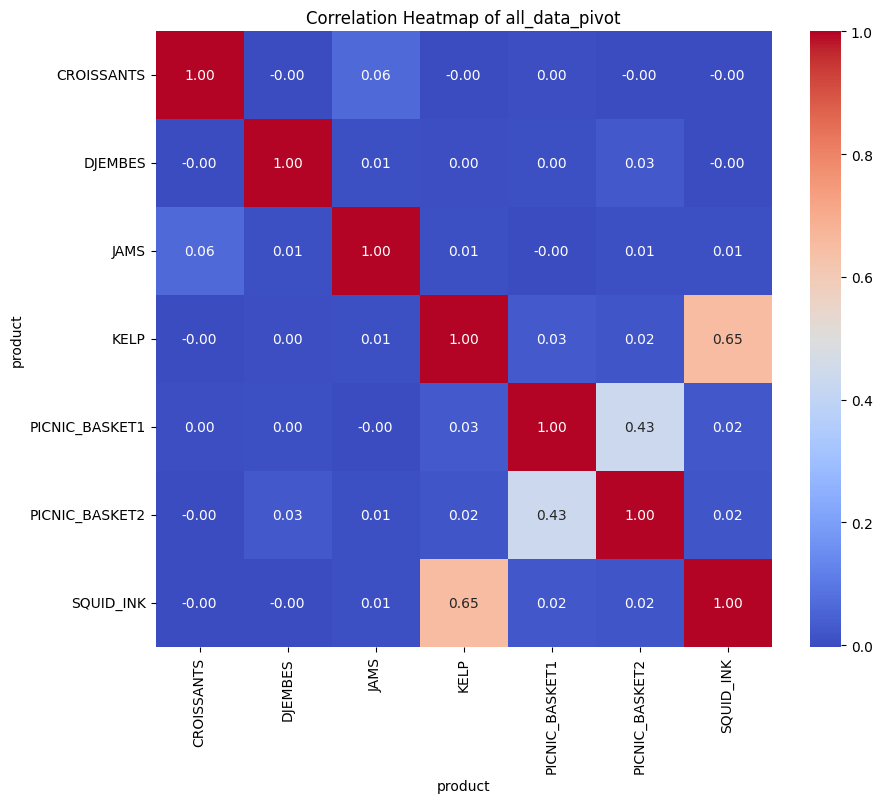

In [29]:
# Compute the correlation matrix
corr_matrix = all_data_pivot["ask_volume_1"].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of all_data_pivot")
plt.show()


# Analysis Assets

## Croissants

In [50]:
all_data_pivot["ask_price_1"].columns

Index(['CROISSANTS', 'DJEMBES', 'JAMS', 'KELP', 'PICNIC_BASKET1',
       'PICNIC_BASKET2', 'SQUID_INK'],
      dtype='object', name='product')

CROISSANTS


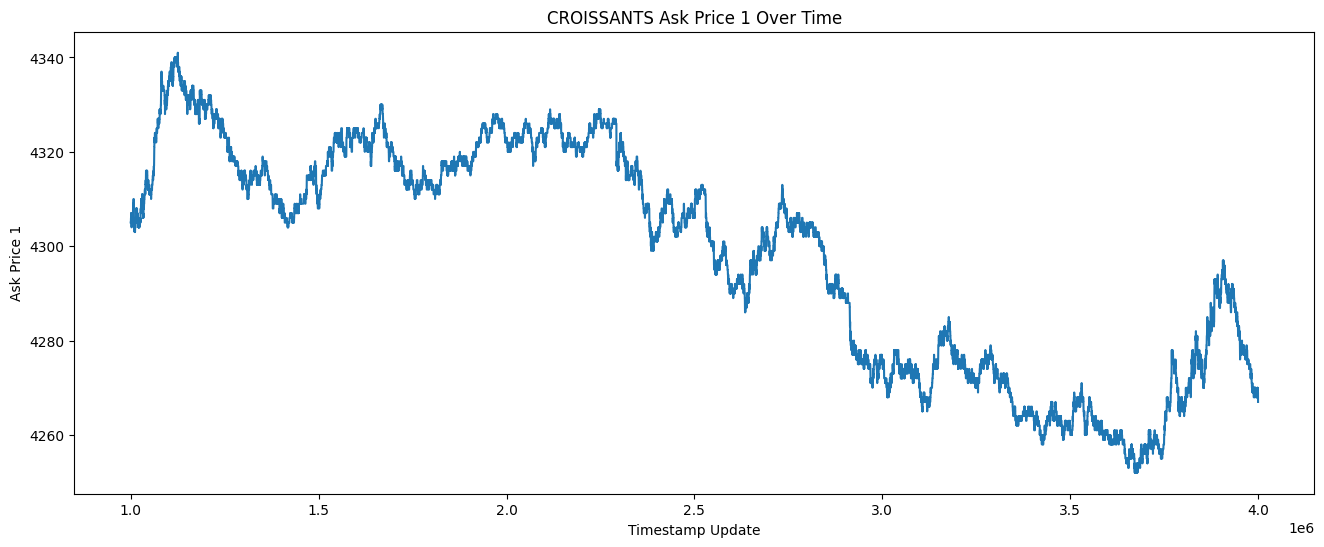

count    30000.000000
mean      4298.444900
std         23.778614
min       4252.000000
25%       4275.000000
50%       4305.000000
75%       4319.000000
max       4341.000000
Name: CROISSANTS, dtype: float64
DJEMBES


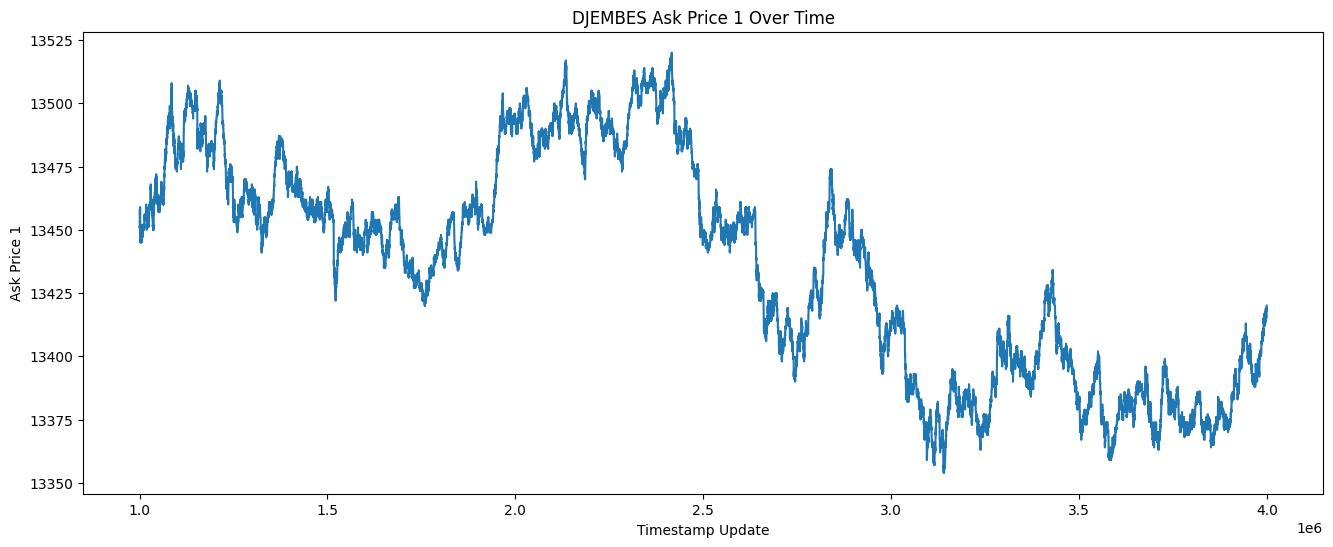

count    30000.000000
mean     13436.863300
std         42.951236
min      13354.000000
25%      13396.000000
50%      13445.000000
75%      13471.000000
max      13520.000000
Name: DJEMBES, dtype: float64
JAMS


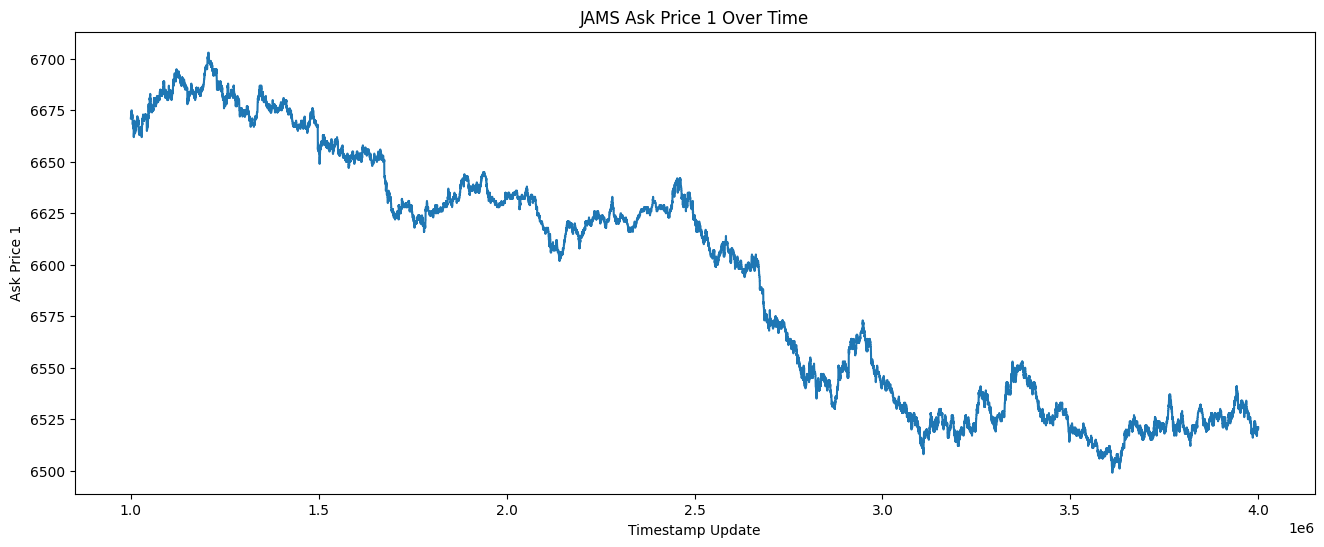

count    30000.000000
mean      6594.129833
std         59.552761
min       6499.000000
25%       6530.000000
50%       6611.000000
75%       6637.000000
max       6703.000000
Name: JAMS, dtype: float64
KELP


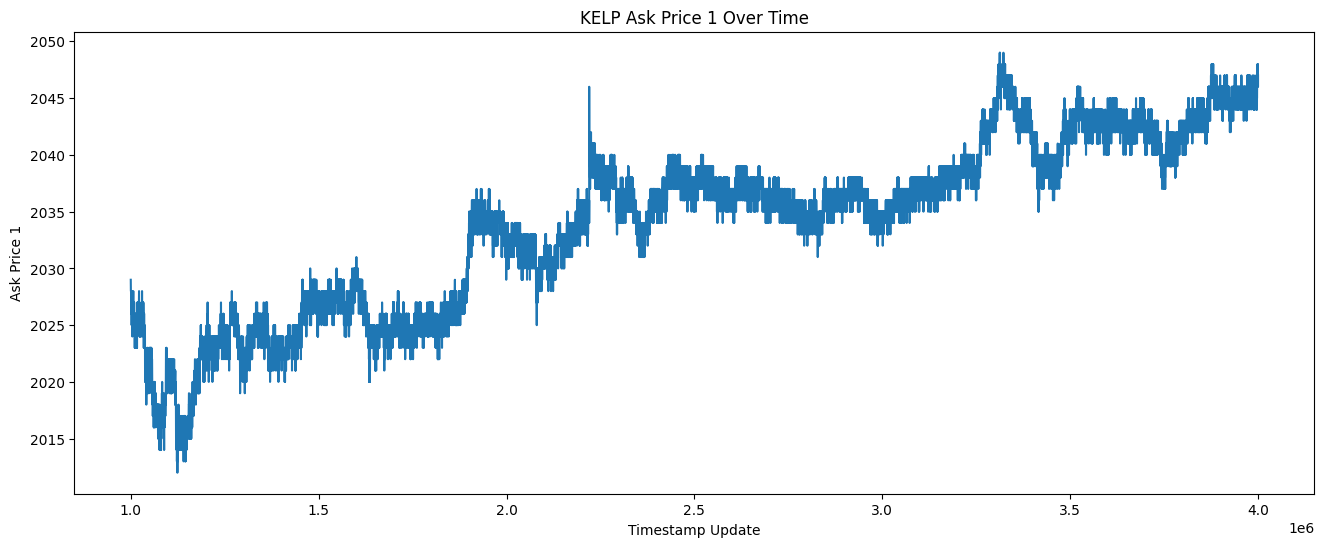

count    30000.000000
mean      2034.429467
std          7.606735
min       2012.000000
25%       2027.000000
50%       2036.000000
75%       2040.000000
max       2049.000000
Name: KELP, dtype: float64
PICNIC_BASKET1


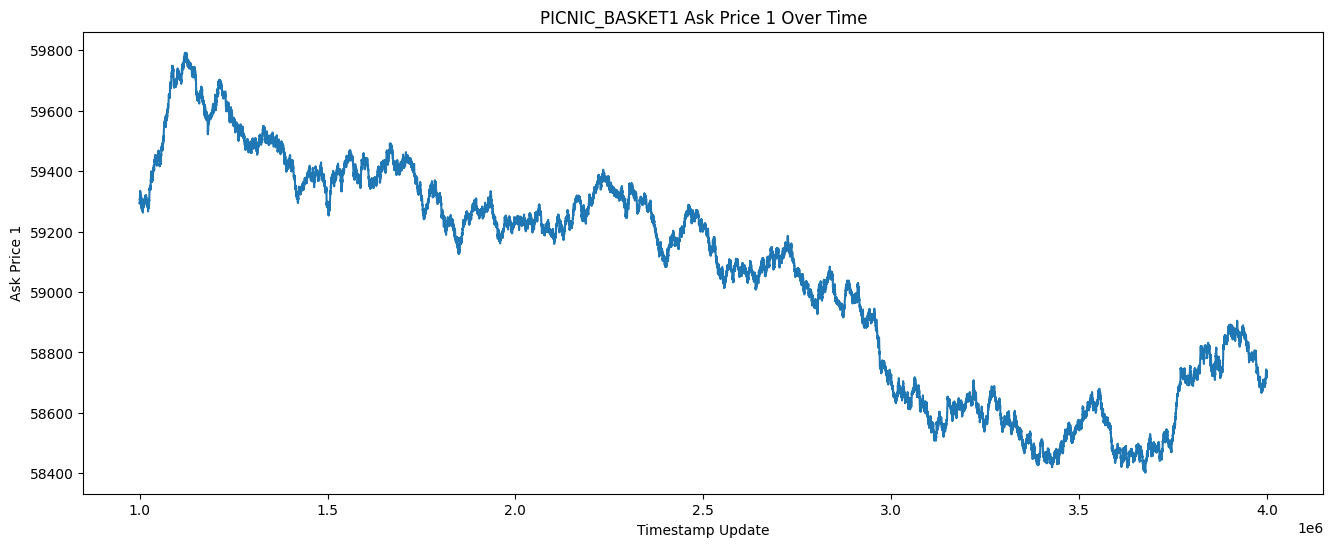

count    30000.000000
mean     59056.609200
std        363.702244
min      58402.000000
25%      58683.000000
50%      59148.000000
75%      59340.000000
max      59792.000000
Name: PICNIC_BASKET1, dtype: float64
PICNIC_BASKET2


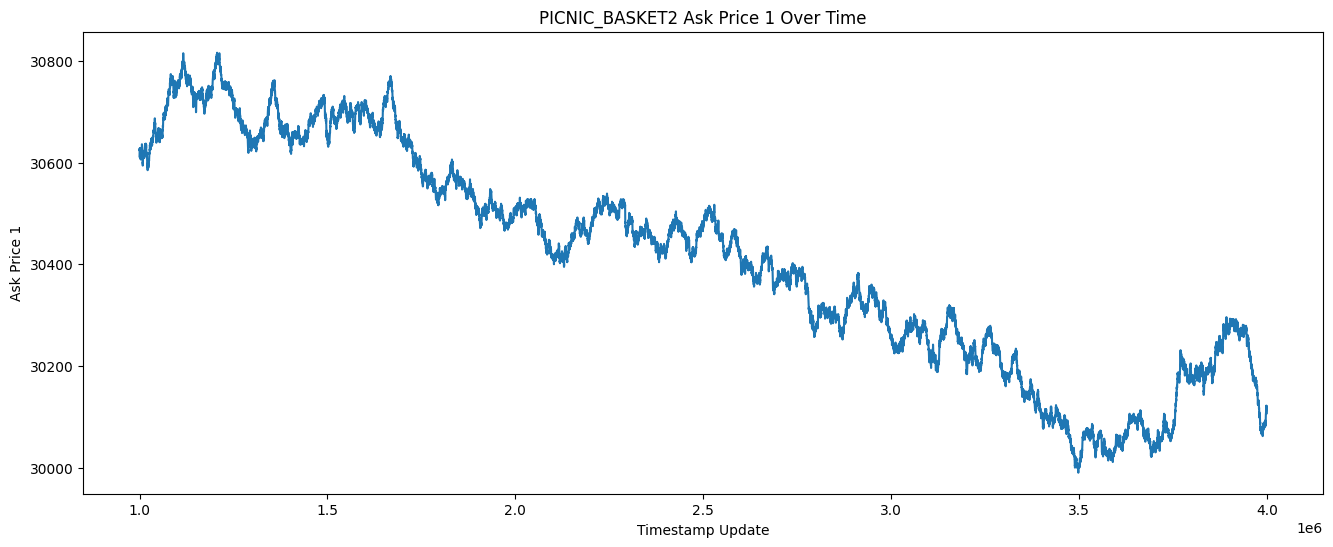

count    30000.000000
mean     30410.844400
std        214.993748
min      29990.000000
25%      30239.000000
50%      30429.000000
75%      30592.000000
max      30816.000000
Name: PICNIC_BASKET2, dtype: float64
SQUID_INK


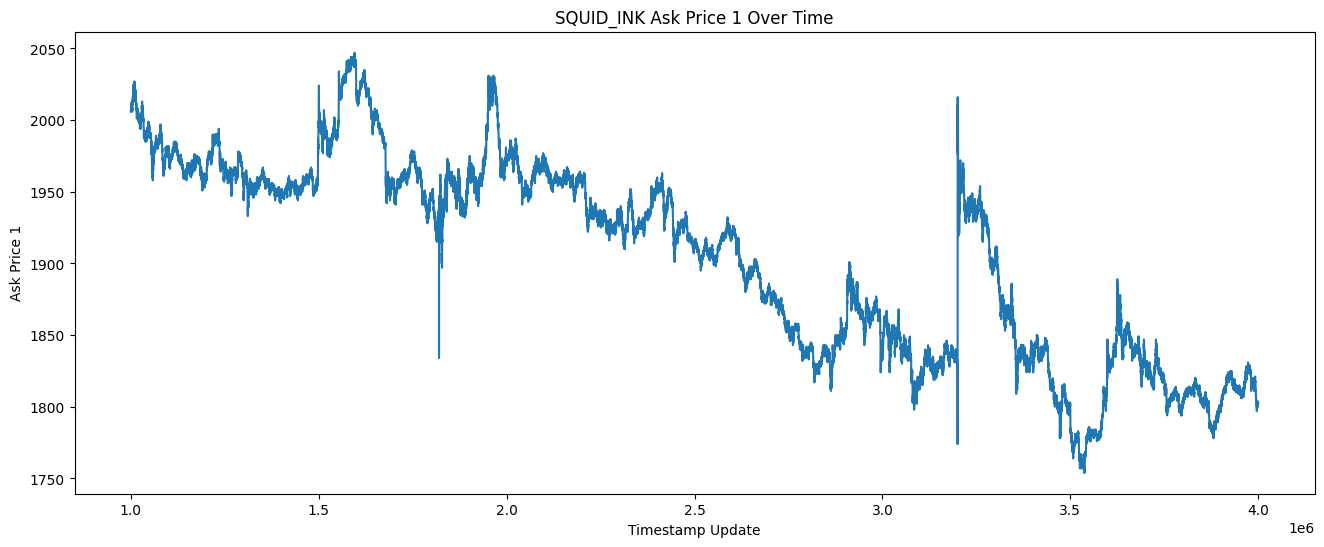

count    30000.000000
mean      1905.176933
std         68.198534
min       1754.000000
25%       1840.000000
50%       1925.000000
75%       1960.000000
max       2047.000000
Name: SQUID_INK, dtype: float64


In [54]:
for col in all_data_pivot["ask_price_1"].columns:
    
    print(col)
    ## PLOT FIGURRE
    plt.figure(figsize=(16, 6))
    plt.plot(all_data_pivot["ask_price_1"][col])
    plt.title(f"{col} Ask Price 1 Over Time")
    plt.xlabel("Timestamp Update")
    plt.ylabel("Ask Price 1")
    plt.show()

    print(all_data_pivot["ask_price_1"][col].describe())

# Mispricing Analysis

# BASKET 2

`PICNIC_BASKET2` contains just two products: 

1. Four (4) `CROISSANTS`
2. Two (2) `JAMS`

Essentially compare if the $underlying-bid \neq basket-ask$

In [136]:
all_data_pivot["bid_price_1"]["PICNIC_BASKET2"].min() / (4*all_data_pivot["ask_price_1"]["CROISSANTS"].max() + 2* all_data_pivot["ask_price_1"]["JAMS"].max())*60

58.4692882677933

In [ ]:
(4*all_data_pivot["ask_price_1"]["CROISSANTS"] + 2* all_data_pivot["ask_price_1"]["JAMS"])

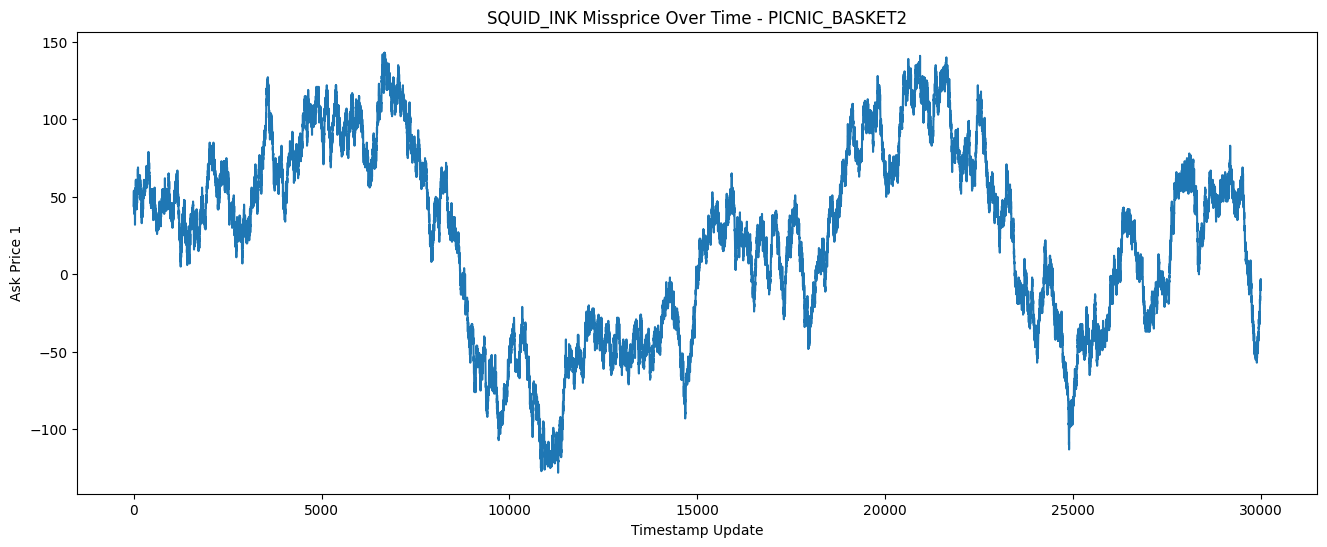

count    30000.000000
mean        23.579200
std         59.861592
min       -128.000000
25%        -29.000000
50%         32.000000
75%         68.000000
max        143.000000
dtype: float64

In [83]:
missprice_2 =  all_data_pivot["bid_price_1"]["PICNIC_BASKET2"] -(4*all_data_pivot["ask_price_1"]["CROISSANTS"] + 2* all_data_pivot["ask_price_1"]["JAMS"])
missprice_2.reset_index(drop=True, inplace=True)
plt.figure(figsize=(16, 6))
plt.plot(missprice_2)
plt.title(f"{col} Missprice Over Time - PICNIC_BASKET2")
plt.xlabel("Timestamp Update")
plt.ylabel("Ask Price 1")
plt.show()

missprice_2.describe()

## PICNIC_BASKET1

`PICNIC_BASKET1` contains three products: 

1. Six (6) `CROISSANTS`
2. Three (3) `JAMS`
3. One (1) `DJEMBE`

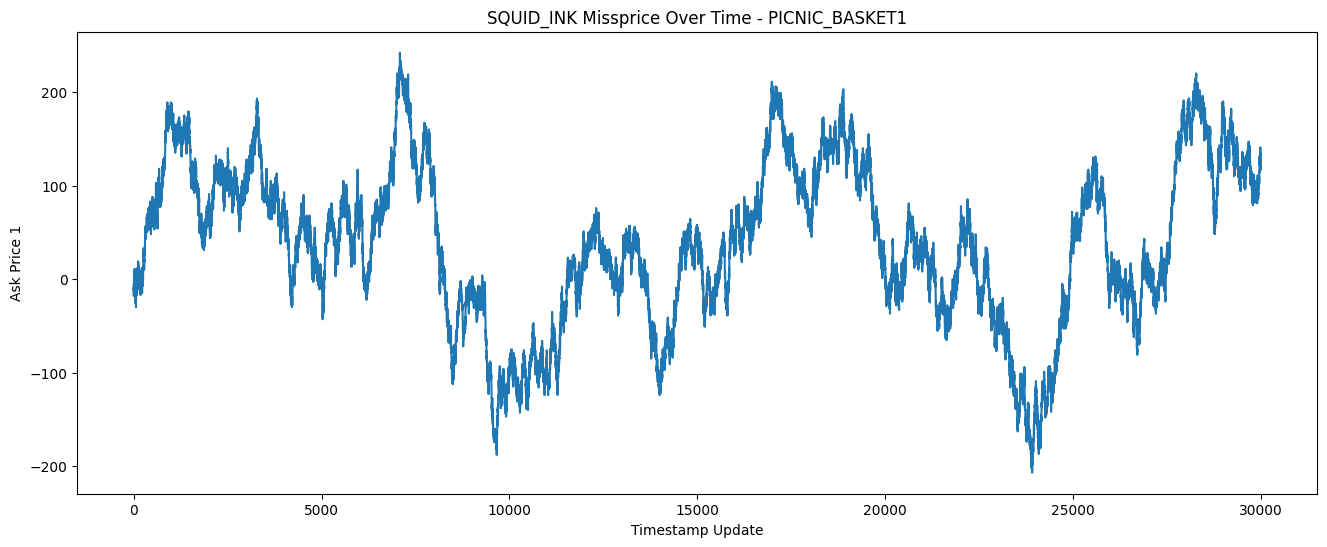

In [139]:
missprice_1 = all_data_pivot["bid_price_1"]["PICNIC_BASKET1"] - (6*all_data_pivot["ask_price_1"]["CROISSANTS"] + 3* all_data_pivot["ask_price_1"]["JAMS"]+all_data_pivot["ask_price_1"]["DJEMBES"])

missprice_1.reset_index(drop=True, inplace=True)

plt.figure(figsize=(16, 6))
plt.plot(missprice_1)
plt.title(f"{col} Missprice Over Time - PICNIC_BASKET1")
plt.xlabel("Timestamp Update")
plt.ylabel("Ask Price 1")
plt.show()


In [140]:
missprice_1.describe()

count    30000.000000
mean        37.441800
std         85.148401
min       -207.000000
25%        -16.000000
50%         39.000000
75%        101.000000
max        242.000000
dtype: float64

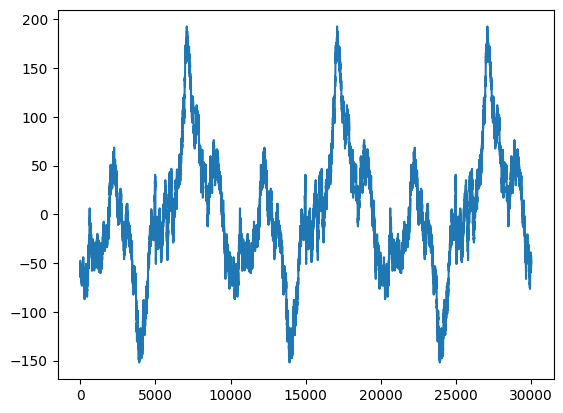

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(missprice_1, model='additive', period=10000)
seasonal_component = result.seasonal


plt.plot(seasonal_component)

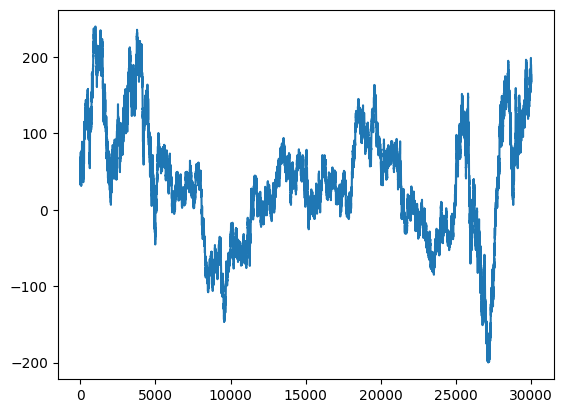

In [146]:
plt.plot(missprice_1 - seasonal_component)

In [93]:
missprice_1 = pd.DataFrame(missprice_1)
missprice_1.reset_index(drop=False, inplace=True)
missprice_1.columns = ["ds", "y"]

In [97]:
df

,ds,y
0,1970-01-01,-10.0
1,1970-01-02,-12.0
2,1970-01-03,-9.0
3,1970-01-04,-11.0
4,1970-01-05,-18.0
...,...,...
29995,2052-02-15,120.0
29996,2052-02-16,122.0
29997,2052-02-17,120.0
29998,2052-02-18,125.0


01:21:15 - cmdstanpy - INFO - Chain [1] start processing
01:21:35 - cmdstanpy - INFO - Chain [1] done processing


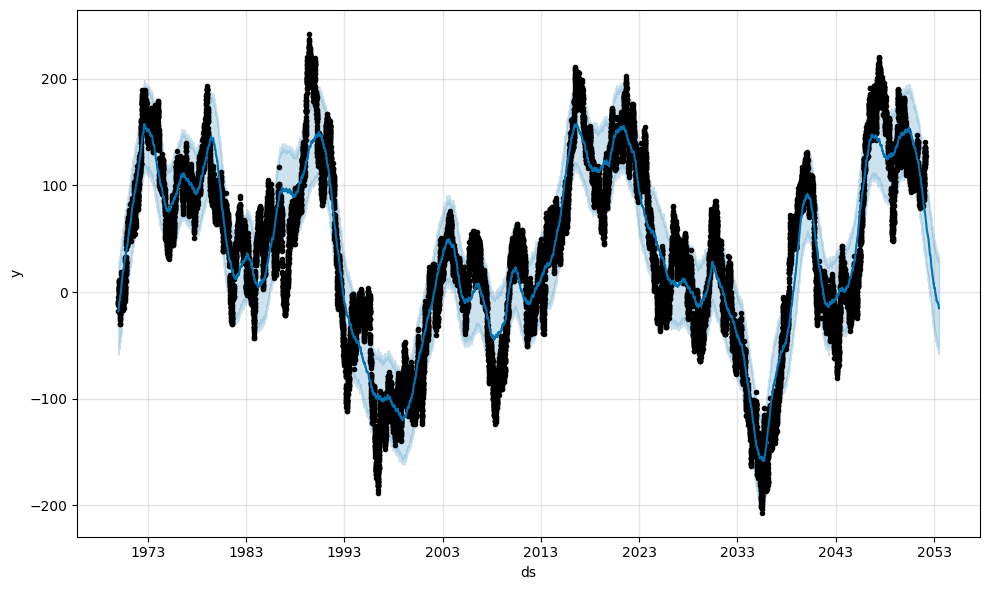

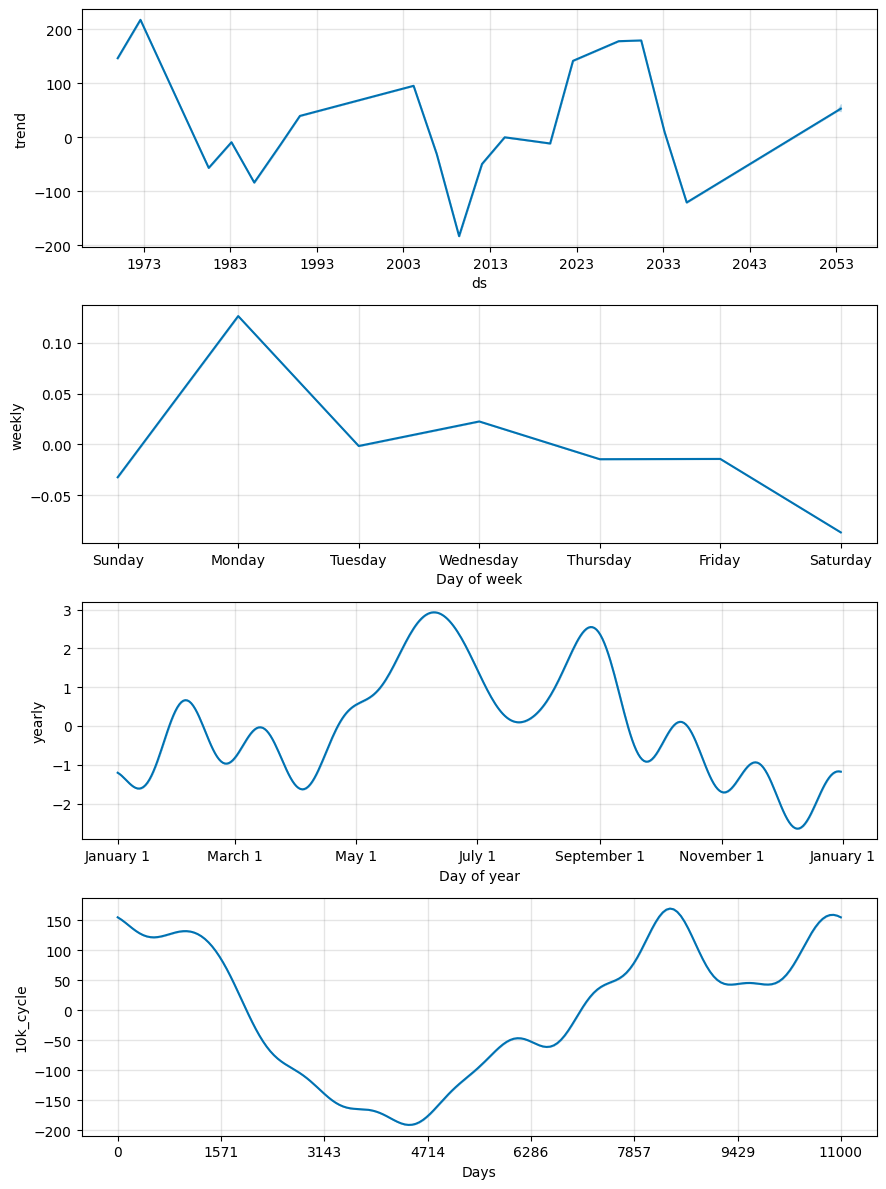

In [123]:

# missprice_1 should be a DataFrame with columns 'ds' (timestamp) and 'y' (value)
# If not, rename accordingly:
# missprice_1 = missprice_1.rename(columns={'your_time_column': 'ds', 'your_value_column': 'y'})
from prophet import Prophet
import pandas as pd

# Load your data (assuming already in DataFrame 'missprice_1')
# Ensure it's in the right format
df = missprice_1.copy()
df['ds'] = pd.to_datetime(df['ds'], unit='D')  # fake daily timestamps
# If 'ds' is just an index, we pretend each point is 1 day apart

# Initialize model
m = Prophet()

# Add custom seasonality for the known ~10,000 unit cycle
m.add_seasonality(name='10k_cycle', period=11000, fourier_order=10)

# Fit model
m.fit(df)

# Make future dataframe for prediction (e.g., 500 steps forward)
future = m.make_future_dataframe(periods=500)
forecast = m.predict(future)

# Plot forecast + seasonalities
m.plot(forecast)
m.plot_components(forecast)

# Initialize the Prophet model
model = Prophet()

# Add a custom seasonal component with a period around 10,000 units
# You may need to tune this depending on your x-axis unit (e.g., days, hours, index steps)
model.add_seasonality(name='cycle_10k', period=10000, fourier_order=10)




In [112]:
forecast["10k_cycle"].mean()

np.float64(-1.0647418214336757)

In [116]:
forecast["trend"].argmax()

np.int64(960)

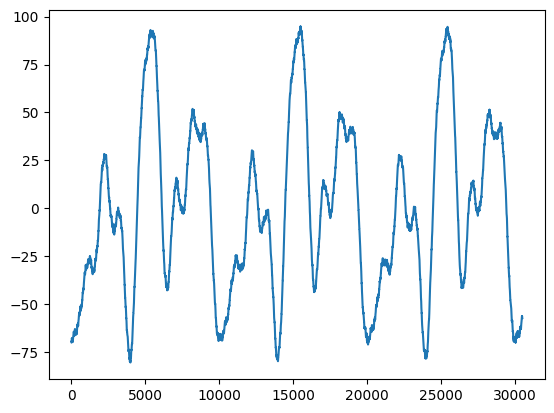

In [118]:
plt.plot(forecast["yhat"] - forecast["trend"])

In [111]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       '10k_cycle', '10k_cycle_lower', '10k_cycle_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper', 'weekly',
       'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

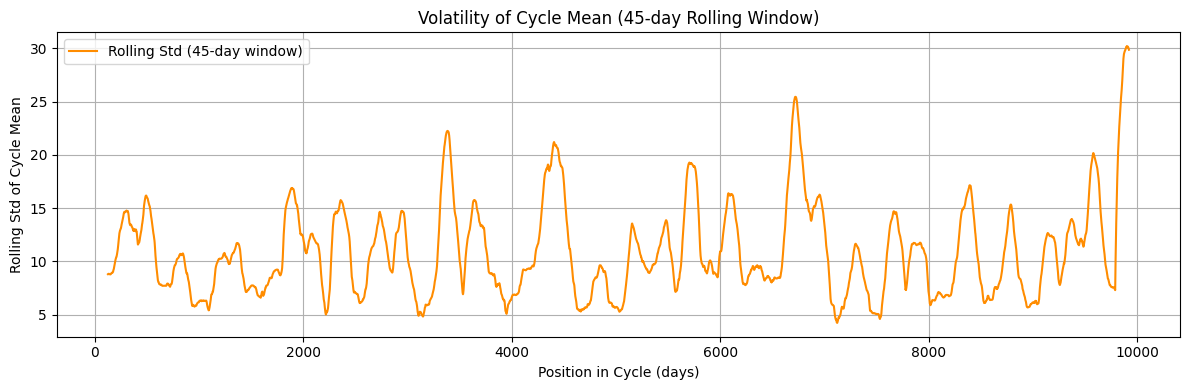

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume cycle_stats is already defined with ['cycle_day', 'mean', 'std']
# If not, refer to the previous code block to compute it

# Compute rolling std over the mean curve
cycle_stats['rolling_std'] = cycle_stats['mean'].rolling(window=250, center=True).std()

# Plot the rolling std
plt.figure(figsize=(12, 4))
plt.plot(cycle_stats['cycle_day'], cycle_stats['rolling_std'], color='darkorange', label='Rolling Std (45-day window)')
plt.ylabel('Rolling Std of Cycle Mean')
plt.title('Volatility of Cycle Mean (45-day Rolling Window)')
plt.xlabel('Position in Cycle (days)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [108]:
cycle_stats['rolling_std'].mean()

np.float64(10.904227507423077)

In [102]:
cycle_stats["mean"].mean()

np.float64(37.03590866852515)